In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif


# dataframes
dfAccident = pd.read_csv('datasets/accident_clean.csv')

In [16]:
dfAccident.columns

Index(['ACCIDENT_NO', 'ACCIDENT_DATE', 'LIGHT_CONDITION', 'ROAD_GEOMETRY',
       'ROAD_GEOMETRY_DESC', 'SEVERITY', 'ATMOSPH_COND', 'ATMOSPH_COND_DESC',
       'SURFACE_COND', 'SURFACE_COND_DESC', 'ACCIDENT_YEAR', 'VEHICLE_AGE',
       'TOTAL_NO_OCCUPANTS', 'VEHICLE_TYPE_MODE', 'VEHICLE_TYPE', 'NUM_PEOPLE',
       'SEVERE_INJURED', 'AGE_GROUP_MODE', 'SEATING_MODE', 'AGE_CODE',
       'ROAD_BINARY', 'SEAT_BINARY', 'SEAT_CAT', 'ATM_BINARY', 'ROAD_RISK',
       'ATM_RISK', 'WEATHER_RISK', 'WEATHER_RISK_NORM', 'VEHICLE_AGE_NORM',
       'TOTAL_OCCUPANTS_NORM', 'SEVERITY_ORD', 'SEVERITY_DESC'],
      dtype='object')

In [11]:
# For better calling, we declare each column as new variable

severity = dfAccident['SEVERITY_ORD']
atmosph = dfAccident['ATMOSPH_COND']
surface = dfAccident['SURFACE_COND']
v_age = dfAccident['VEHICLE_AGE']
occup = dfAccident['NUM_PEOPLE']
v_type = dfAccident['VEHICLE_TYPE_MODE']
age_g = dfAccident['AGE_CODE']
seat = dfAccident['SEATING_MODE']
light = dfAccident['LIGHT_CONDITION']
atm_risk = dfAccident['ATM_RISK']
road_risk = dfAccident['ROAD_RISK']
road_geom = dfAccident['ROAD_GEOMETRY']



In [4]:
# This whole block of NMI computation code obtained from the Tutorial Week 7

# Defining Probability Computation
def compute_probability(col):
    return col.value_counts() / len(col)

# Defining Entropy Computation
def compute_entropy(col):
    probabilities = compute_probability(col)
    entropy = -sum(probabilities * np.log2(probabilities))
    return entropy

# Defining Conditional Entropy of Y given X
def compute_conditional_entropy(x, y):
    probability_x = compute_probability(x)
    temp_df = pd.DataFrame({'X': x, 'Y': y})
    entropy_by_group = temp_df.groupby('X')['Y'].aggregate(compute_entropy)
    conditional_entropy = sum(probability_x * entropy_by_group)
    return conditional_entropy

# Defining NMI function
def NMI(x, y):
    # H(X) and H(Y)
    entropy_x = compute_entropy(x)
    entropy_y = compute_entropy(y)
    
    # H(Y|X)
    conditional_entropy = compute_conditional_entropy(x, y)
    
    # MI(X, Y)
    MI = entropy_y - conditional_entropy 
    # same as MI = entropy_x - compute_conditional_entropy(y, x)
    return MI / min(entropy_x, entropy_y)

In [20]:
x_features = {'Atm_Cond':atmosph,
           'Surf_Cond':surface,
           'Veh_Age':v_age,
           'Occup':occup,
           'Veh_Type':v_type,
           'Age_G':age_g,
           'Seats':seat,
           'Road_Risk':road_risk,
           'Atm_Risk':atm_risk,
           'Road_Geom':road_geom,
           'Light_Cond':light}

labels=list(x_features.keys())
features = list(x_features.values())

n=len(features)

# We use AI tools to get the general idea how to build a matrix with python

nmi_matrix = pd.DataFrame(np.zeros((n, n)), index=labels, columns=labels)

# Looping NMI for each features i and j
for i in range(n):
    for j in range (i+1, n):
        nmi_val = NMI(features[i], features[j])
        
        nmi_matrix.iloc[i, j] = nmi_val
        nmi_matrix.iloc[j, i] = nmi_val

# Colorize Matrix for better view
nmi_color = nmi_matrix.style.background_gradient(cmap='Reds').format("{:.4f}")
display(nmi_color)




,Atm_Cond,Surf_Cond,Veh_Age,Occup,Veh_Type,Age_G,Seats,Road_Risk,Atm_Risk,Road_Geom,Light_Cond
Atm_Cond,0.0000,0.5138,0.0109,0.0103,0.0041,0.0025,0.0040,0.5152,1.0000,0.0046,0.0228
Surf_Cond,0.5138,0.0000,0.0107,0.0119,0.0036,0.0022,0.0044,1.0000,0.5368,0.0057,0.0222
Veh_Age,0.0109,0.0107,0.0000,0.0783,0.0402,0.0085,0.0355,0.0103,0.0091,0.0144,0.0126
Occup,0.0103,0.0119,0.0783,0.0000,0.0164,0.0477,0.2339,0.0118,0.0107,0.0393,0.0205
Veh_Type,0.0041,0.0036,0.0402,0.0164,0.0000,0.0149,0.0482,0.0034,0.0038,0.0065,0.0092
Age_G,0.0025,0.0022,0.0085,0.0477,0.0149,0.0000,0.1088,0.0021,0.0018,0.0013,0.0135
Seats,0.0040,0.0044,0.0355,0.2339,0.0482,0.1088,0.0000,0.0038,0.0033,0.0115,0.0087
Road_Risk,0.5152,1.0000,0.0103,0.0118,0.0034,0.0021,0.0038,0.0000,0.5363,0.0057,0.0222
Atm_Risk,1.0000,0.5368,0.0091,0.0107,0.0038,0.0018,0.0033,0.5363,0.0000,0.0047,0.0228
Road_Geom,0.0046,0.0057,0.0144,0.0393,0.0065,0.0013,0.0115,0.0057,0.0047,0.0000,0.0171


In [21]:
severity_desc = dfAccident['SEVERITY_DESC']
severity_order = ['Fatal accident', 'Serious injury accident',
                  'Other injury accident', 'Non injury accident']

# Defining Function to Draw the heatmap

def heatmap_initiation (x_features, labels, width, height):
    fig, ax = plt.subplots(figsize=(width,height))
    hm= pd.DataFrame({
        labels: x_features,
        'SEVERITY': severity_desc}).groupby(['SEVERITY',labels]).size().unstack(fill_value=0)
    
    # Order the Severity of Accident
    hm = hm.reindex(severity_order)
    sns.heatmap(hm, annot=True, fmt='d', cmap='Reds')
    plt.ylabel('Severity',fontsize=12)
    plt.xlabel(labels,fontsize=12)
    plt.title('Severity vs '+labels, fontsize=12)
    plt.show()
    return heatmap_initiation


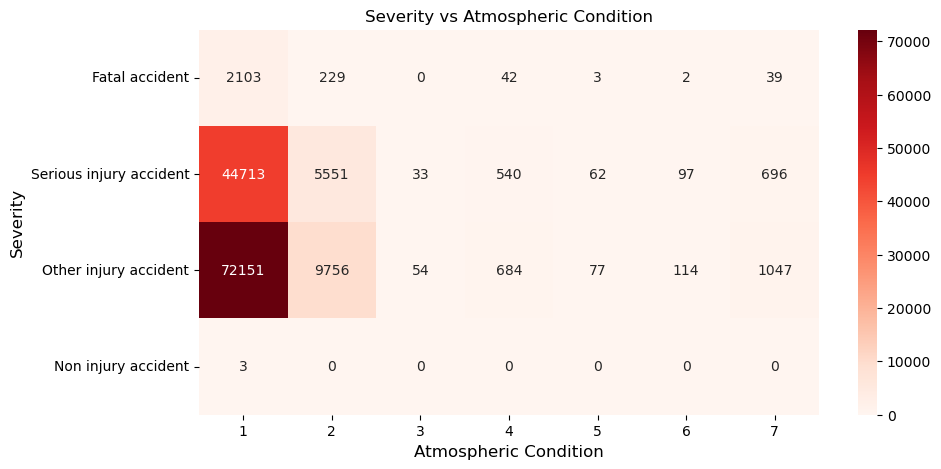

<function __main__.heatmap_initiation(x_features, labels, width, height)>

In [22]:
# Example Code
atmosph = dfAccident['ATMOSPH_COND']
heatmap_initiation(atmosph, 'Atmospheric Condition',10,5)